# CLUSTERING OF MONOCYTES AND DC
## SID GURAJALA
## 08/24/2023

## READ IN LIBRARIES

In [1]:
library(symphony)
library(dplyr)
library(ggplot2)
library(tidyr)
library(viridis)
library(stringr)
library(pheatmap)
library(ggrepel)
library(presto)
library(pals)
library(Seurat)
library(harmony)
library(singlecellmethods)
library(lisi)
source("/data/srlab/ik936/Foxxy/utils/utils.R")
source("/data/srlab/anathan/scripts/scseq_utils.R")
library(parallel)
set.seed(0)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis


Attaching SeuratObject


Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:SeuratObject’:

    rowMeans


The following objects are masked from ‘package:symphony’:

    findVariableGenes, rowSDs, scaleDataWithStats, vargenes_vst


The following object is masked from ‘package:bas

In [2]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/demux_cell_qcd_gex_seurat_sc_analysis_08232023.rds')

In [3]:
all_obj <- DietSeurat(all_obj)
all_obj <- subset(all_obj, subset = broad.ids %in% c('Monocyte', 'DC'))

## TECHNICAL CLUSTERING

### VARIABLE GENES, SCALING, PCA

In [4]:
VariableFeatures(all_obj) <- NULL

In [5]:
all_obj <- FindVariableFeatures(all_obj, selection.method = "vst", nfeatures = 2500)

In [6]:
all_obj <- ScaleData(all_obj)

Centering and scaling data matrix



In [7]:
all_obj <- RunPCA(all_obj, features = VariableFeatures(object = all_obj))

PC_ 1 
Positive:  S100A9, S100A8, VCAN, CD14, DUSP1, S100A12, SAT1, IFI30, NAMPT, CEBPD 
	   FOS, CEBPB, AC020656.1, ANXA1, SLC2A3, JUNB, C5AR1, DUSP6, AIF1, RGS2 
	   ACSL1, MAFB, S100A10, PLBD1, GLUL, CCR1, RBP7, SOD2, ZFP36L1, CKAP4 
Negative:  ITM2C, SPIB, CLEC4C, LILRA4, SERPINF1, C12orf75, TSPAN13, GZMB, SMPD3, MZB1 
	   TPM2, SCT, NIBAN3, JCHAIN, MAP1A, DERL3, PLD4, UGCG, DNASE1L3, LRRC26 
	   CLIC3, PACSIN1, COBLL1, LINC00996, STMN1, P2RY14, CIB2, VEGFB, SCN9A, LGMN 
PC_ 2 
Positive:  VCAN, S100A8, S100A9, S100A12, CD14, MS4A6A, SELL, FOS, SLC2A3, NCF1 
	   AC020656.1, CD36, NAIP, EMB, CD163, CD99, RNASE6, PLBD1, VIM, CEBPD 
	   AHR, MGST1, CLEC4E, CES1, IRF2BP2, RNASE2, ALOX5AP, ANXA1, HMGB2, IVNS1ABP 
Negative:  FCGR3A, CDKN1C, LST1, HES4, RHOC, TCF7L2, MS4A7, RPS19, MTSS1, CD79B 
	   AIF1, CKB, SIGLEC10, SMIM25, RRAS, ABI3, FCER1G, CX3CR1, NAP1L1, SPN 
	   DRAP1, PPM1N, IFITM2, CSF1R, AC104809.2, KLF2, LRRC25, ADA, NEURL1, FTH1 
PC_ 3 
Positive:  CD83, RASGEF1B, SGK1, DUSP2,

### HARMONY

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10641400)”
Warning message:
“did not converge in 25 iterations”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


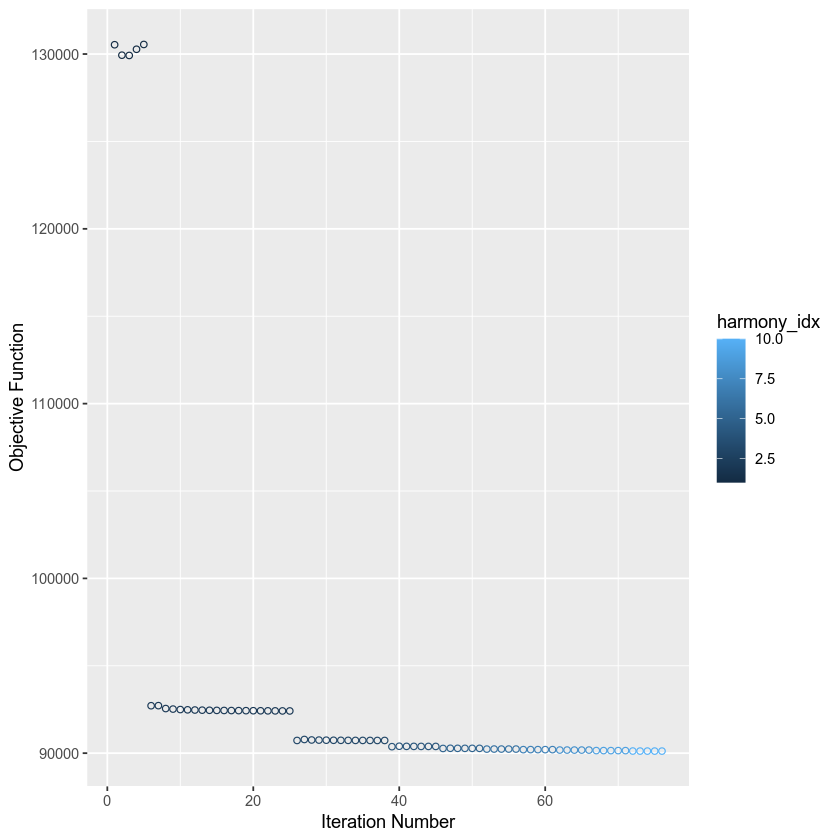

In [8]:
all_obj <- all_obj %>% 
                    RunHarmony(c("Batch", "Unified_Visit"), plot_convergence = TRUE)

### UMAP, CLUSTERING

In [9]:
all_obj <- RunUMAP(all_obj, reduction = "harmony", dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
04:25:05 UMAP embedding parameters a = 0.9922 b = 1.112

04:25:05 Read 212828 rows and found 20 numeric columns

04:25:05 Using Annoy for neighbor search, n_neighbors = 30

04:25:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:25:29 Writing NN index file to temp file /tmp/Rtmpa2p52N/file5a517978b954

04:25:29 Searching Annoy index using 1 thread, search_k = 3000

04:27:12 Annoy recall = 100%

04:27:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [10]:
all_obj <- FindNeighbors(all_obj, reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [11]:
all_obj <- FindClusters(all_obj, resolution = c(0.1, 0.25, 0.5, 0.75, 1.0))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 212828
Number of edges: 4413183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9474
Number of communities: 13
Elapsed time: 94 seconds


5 singletons identified. 8 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 212828
Number of edges: 4413183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9036
Number of communities: 15
Elapsed time: 91 seconds


5 singletons identified. 10 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 212828
Number of edges: 4413183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8661
Number of communities: 18
Elapsed time: 97 seconds


5 singletons identified. 13 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 212828
Number of edges: 4413183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 21
Elapsed time: 98 seconds


5 singletons identified. 16 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 212828
Number of edges: 4413183

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 26
Elapsed time: 93 seconds


5 singletons identified. 21 final clusters.



In [12]:
saveRDS(DietSeurat(all_obj, scale.data = FALSE,
                      dimreducs	= c("pca", "harmony", "umap")),
                   '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_seurat_sc_analysis_08242023.rds')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



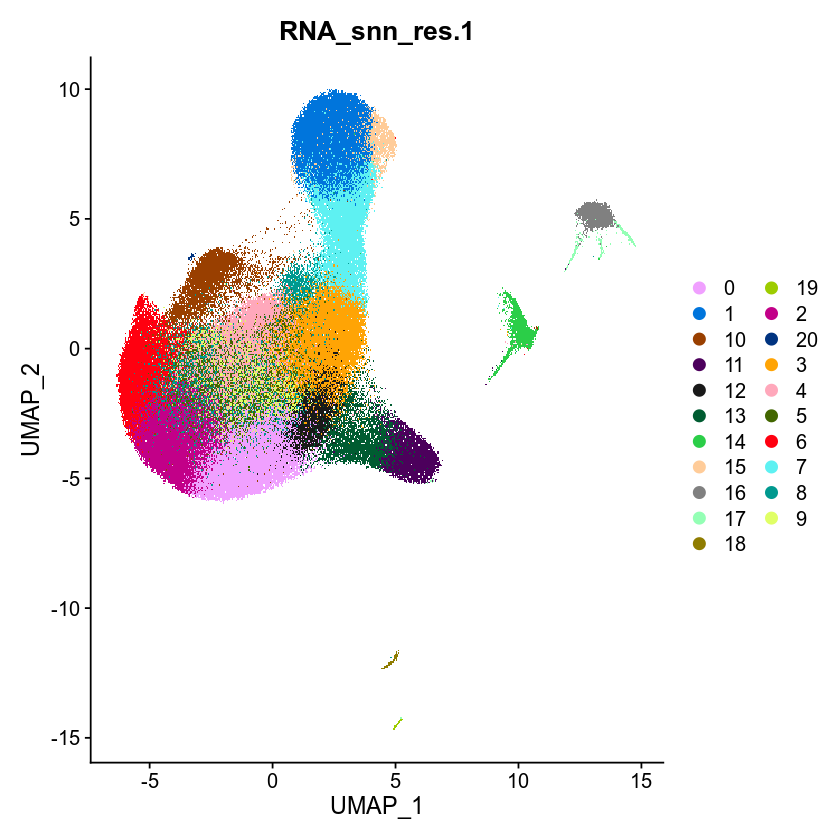

In [33]:
DimPlot(all_obj, cols = as.vector(alphabet(26)), group.by = "RNA_snn_res.1")

Warning message:
“Removed 25 rows containing non-finite values (`stat_boxplot()`).”


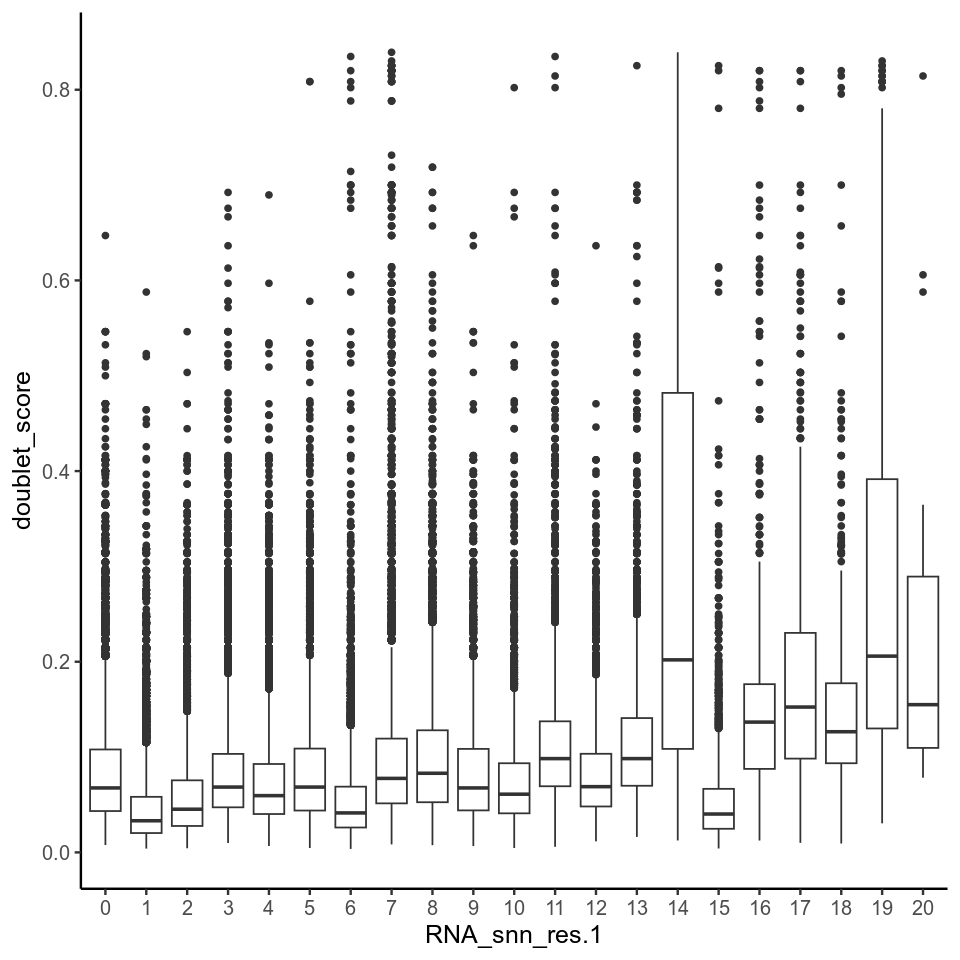

In [34]:
fig.size(8, 8)
ggplot(all_obj@meta.data, 
               aes(x = RNA_snn_res.1, y = doublet_score)) + 
    geom_boxplot() + 
    scale_x_discrete(limits = factor(0:20)) + 
    theme_classic(base_size = 15)

In [36]:
subset_obj <- subset(all_obj, cells = Cells(all_obj)[sample(ncol(all_obj), 20000)])

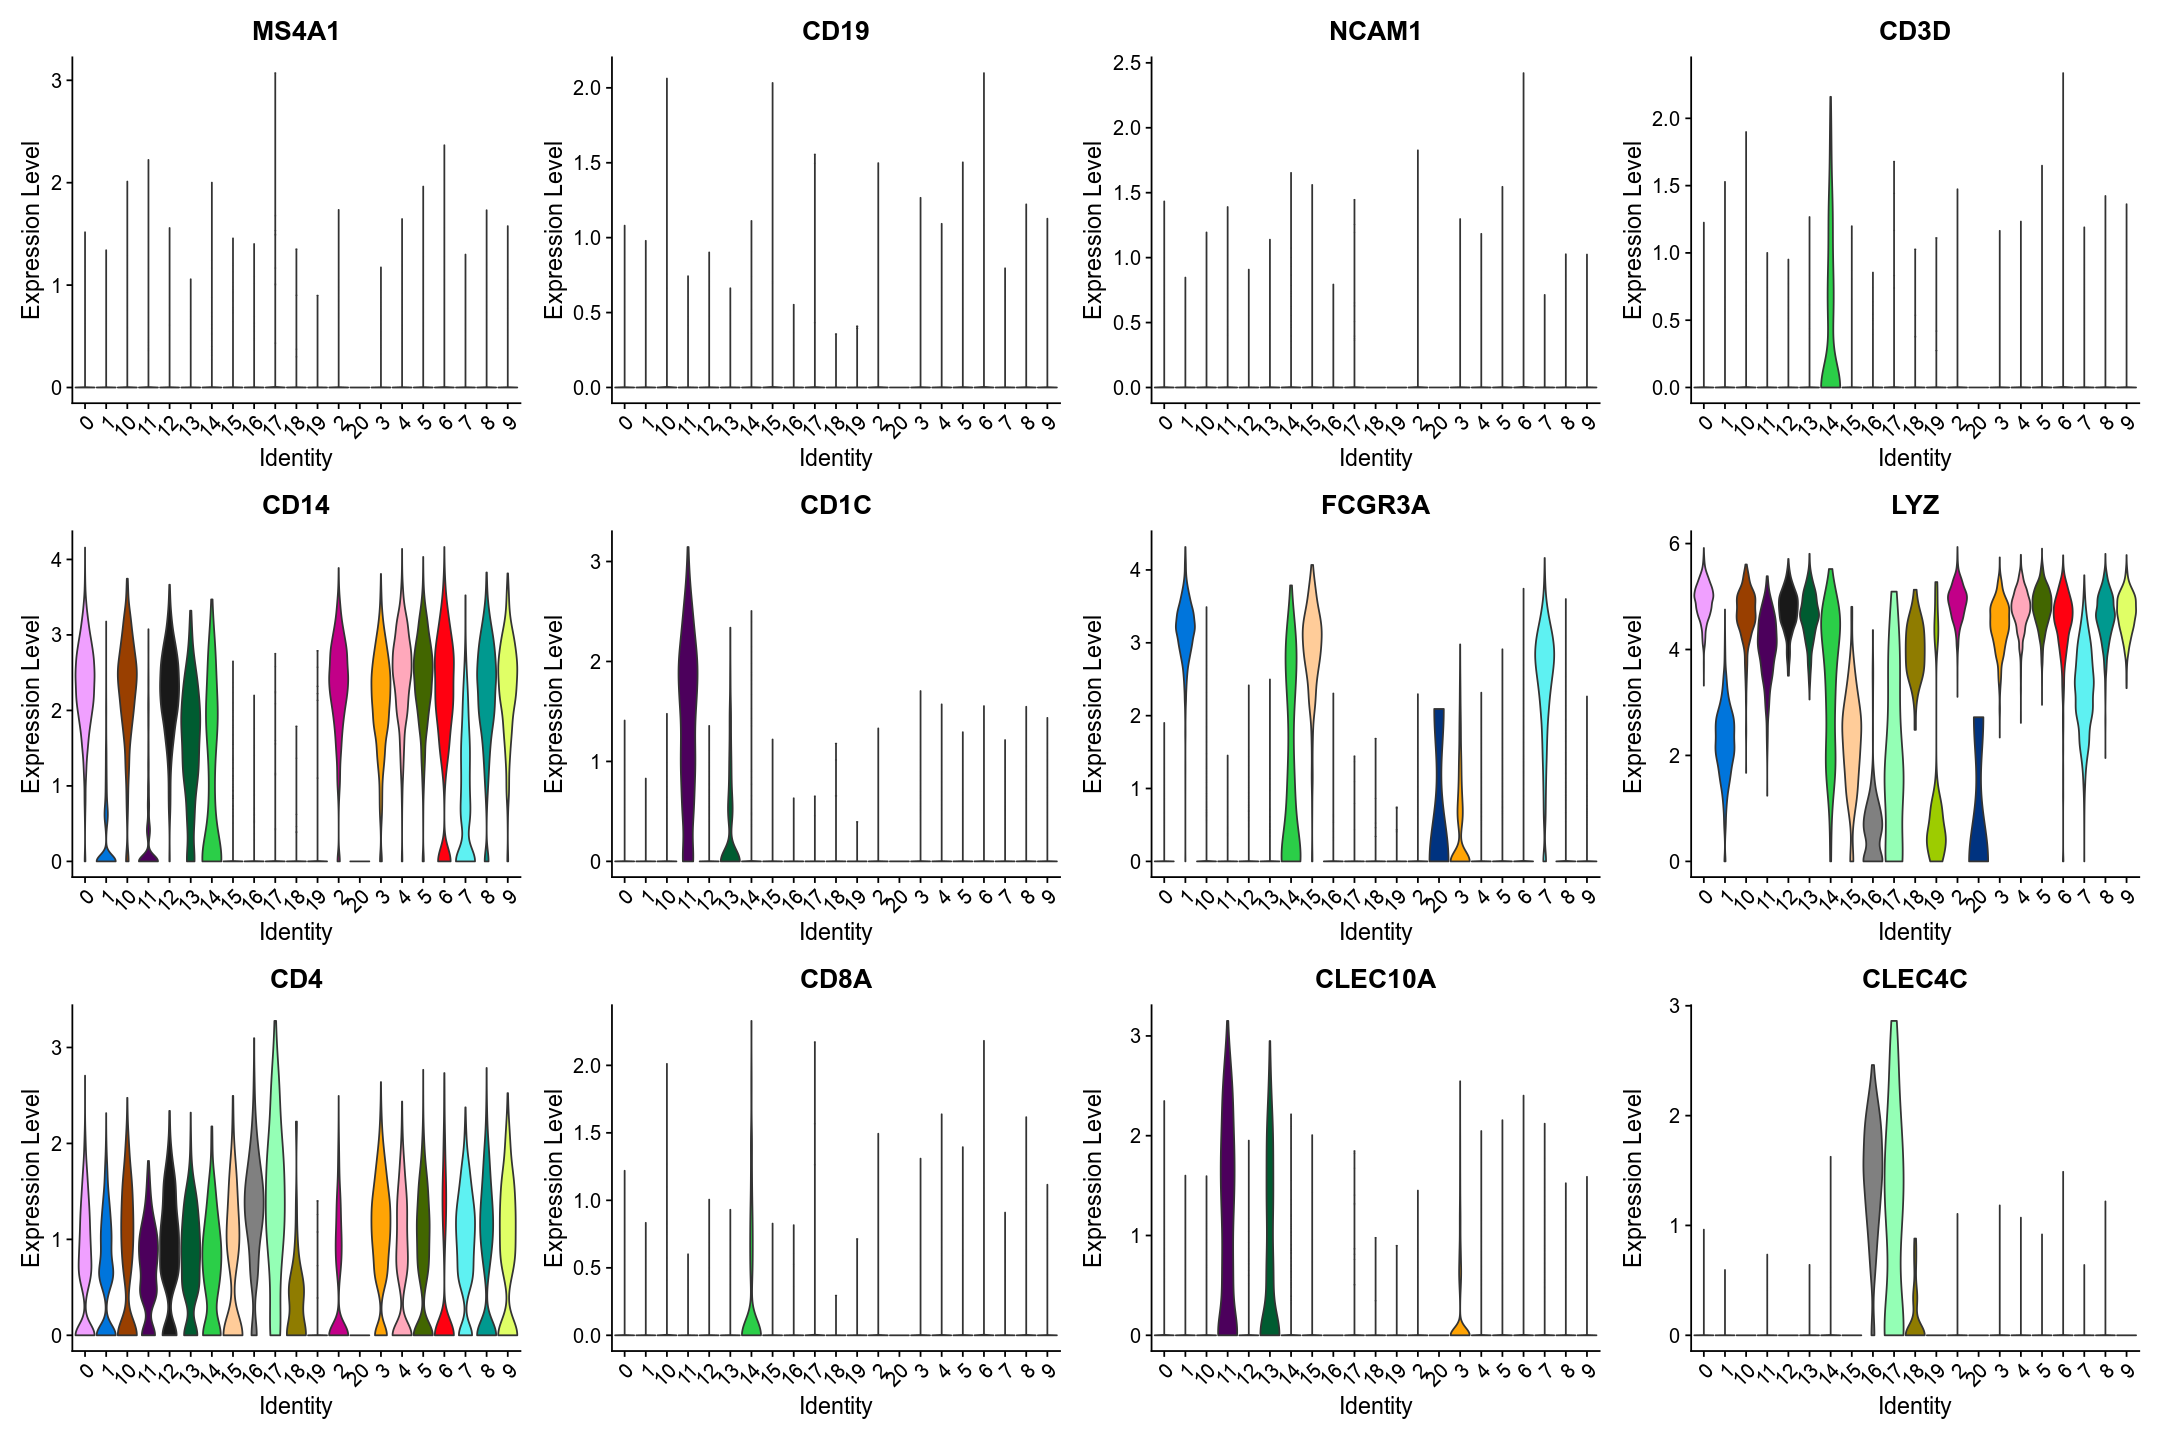

In [37]:
fig.size(12, 18)
VlnPlot(subset_obj,  features = c("MS4A1", "CD19", "NCAM1", "CD3D", 
                                     "CD14", "CD1C", "FCGR3A", 
                                     "LYZ", "CD4", "CD8A",
                                     "CLEC10A", "CLEC4C"), raster = FALSE,
         pt.size = 0, cols = as.vector(alphabet(26)), group.by = 'RNA_snn_res.1')

## CELL STATE EMBEDDINGS

In [3]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_seurat_sc_analysis_08242023.rds')
all_obj <- subset(all_obj, subset = RNA_snn_res.1 != 14)

In [4]:
all_obj <- DietSeurat(all_obj, scale.data = FALSE)
VariableFeatures(all_obj) <- NULL

### VARIABLE GENES, SCALING, PCA

In [5]:
all_obj <- FindVariableFeatures(all_obj, selection.method = "vst", nfeatures = 2500)

In [6]:
all_obj <- ScaleData(all_obj)

Centering and scaling data matrix



In [7]:
all_obj <- RunPCA(all_obj, features = VariableFeatures(object = all_obj))

PC_ 1 
Positive:  ITM2C, SPIB, CLEC4C, LILRA4, SERPINF1, C12orf75, TSPAN13, GZMB, SMPD3, MZB1 
	   TPM2, SCT, NIBAN3, JCHAIN, MAP1A, DERL3, PLD4, UGCG, DNASE1L3, LRRC26 
	   CLIC3, PACSIN1, COBLL1, LINC00996, STMN1, P2RY14, CIB2, VEGFB, SCN9A, LGMN 
Negative:  S100A9, LYZ, S100A8, VCAN, CD14, DUSP1, S100A12, SAT1, CEBPD, NAMPT 
	   FOS, IFI30, AC020656.1, ANXA1, SLC2A3, CEBPB, JUNB, DUSP6, C5AR1, RGS2 
	   S100A10, ACSL1, AIF1, MAFB, PLBD1, GLUL, CCR1, RBP7, CD163, CKAP4 
PC_ 2 
Positive:  FCGR3A, CDKN1C, LST1, HES4, RHOC, TCF7L2, MS4A7, RPS19, MTSS1, AIF1 
	   CD79B, CKB, SIGLEC10, SMIM25, RRAS, ABI3, FCER1G, CX3CR1, SPN, NAP1L1 
	   DRAP1, PPM1N, IFITM2, CSF1R, AC104809.2, KLF2, LRRC25, NEURL1, FTH1, ADA 
Negative:  VCAN, S100A8, LYZ, S100A9, S100A12, CD14, SELL, MS4A6A, FOS, SLC2A3 
	   NCF1, AC020656.1, CD36, NAIP, EMB, CD99, CD163, RNASE6, PLBD1, VIM 
	   CEBPD, AHR, MGST1, ALOX5AP, CES1, IRF2BP2, CLEC4E, RNASE2, HMGB2, ANXA1 
PC_ 3 
Positive:  TXNIP, NFIA, S100A12, HMGB2, PADI4, 

### HARMONY

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“did not converge in 25 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10502750)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..P

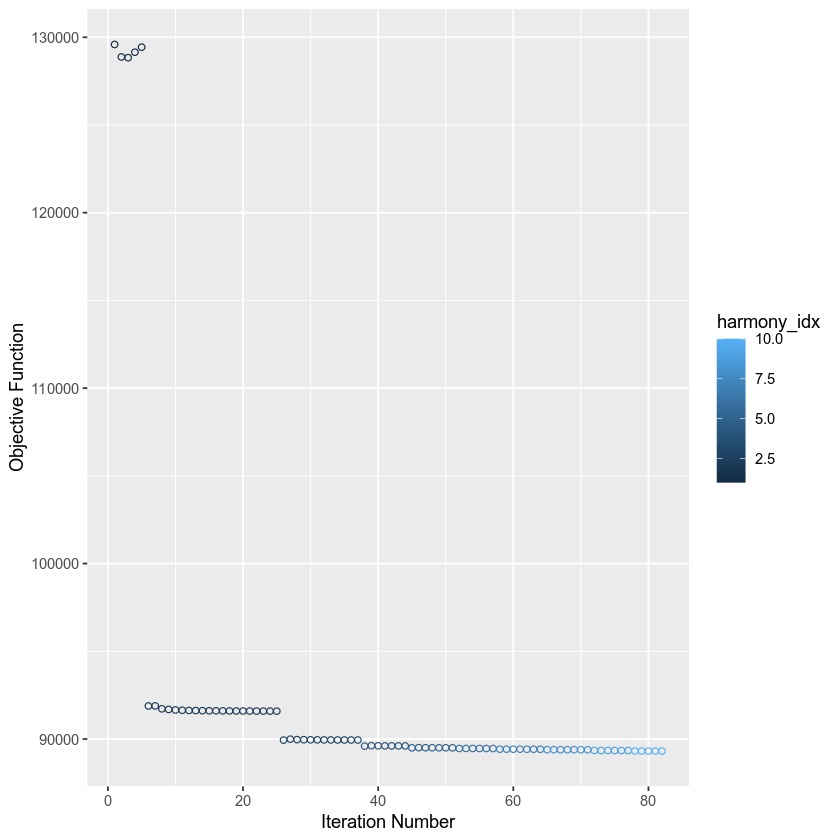

In [8]:
all_obj <- all_obj %>% 
                    RunHarmony(c("Batch", "Unified_Visit"), plot_convergence = TRUE)

### UMAP, CLUSTERING

In [9]:
all_obj <- RunUMAP(all_obj, reduction = "harmony", dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:25:15 UMAP embedding parameters a = 0.9922 b = 1.112

17:25:15 Read 210055 rows and found 20 numeric columns

17:25:15 Using Annoy for neighbor search, n_neighbors = 30

17:25:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:25:39 Writing NN index file to temp file /tmp/RtmpRJQK3u/fileaf362adb6401

17:25:39 Searching Annoy index using 1 thread, search_k = 3000

17:27:19 Annoy recall = 100%

17:27:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [10]:
all_obj <- FindNeighbors(all_obj, reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [11]:
all_obj <- FindClusters(all_obj, resolution = c(0.1, 0.25, 0.5, 0.75, 1.0))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 210055
Number of edges: 4324559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9451
Number of communities: 8
Elapsed time: 110 seconds


1 singletons identified. 7 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 210055
Number of edges: 4324559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 10
Elapsed time: 87 seconds


1 singletons identified. 9 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 210055
Number of edges: 4324559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 13
Elapsed time: 89 seconds


1 singletons identified. 12 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 210055
Number of edges: 4324559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8334
Number of communities: 15
Elapsed time: 90 seconds


1 singletons identified. 14 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 210055
Number of edges: 4324559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8128
Number of communities: 19
Elapsed time: 91 seconds


1 singletons identified. 18 final clusters.



In [12]:
saveRDS(DietSeurat(all_obj, scale.data = FALSE,
                      dimreducs	= c("pca", "harmony", "umap")),
                   '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_qcd_seurat_sc_analysis_08252023.rds')

In [2]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_qcd_seurat_sc_analysis_08252023.rds')

In [2]:
all_obj

An object of class Seurat 
36601 features across 210055 samples within 1 assay 
Active assay: RNA (36601 features, 2500 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

## Cell State Assignments

In [53]:
de_res0.5 <- wilcoxauc(all_obj[['RNA']]@data, 
                       all_obj@meta.data$RNA_snn_res.0.5)

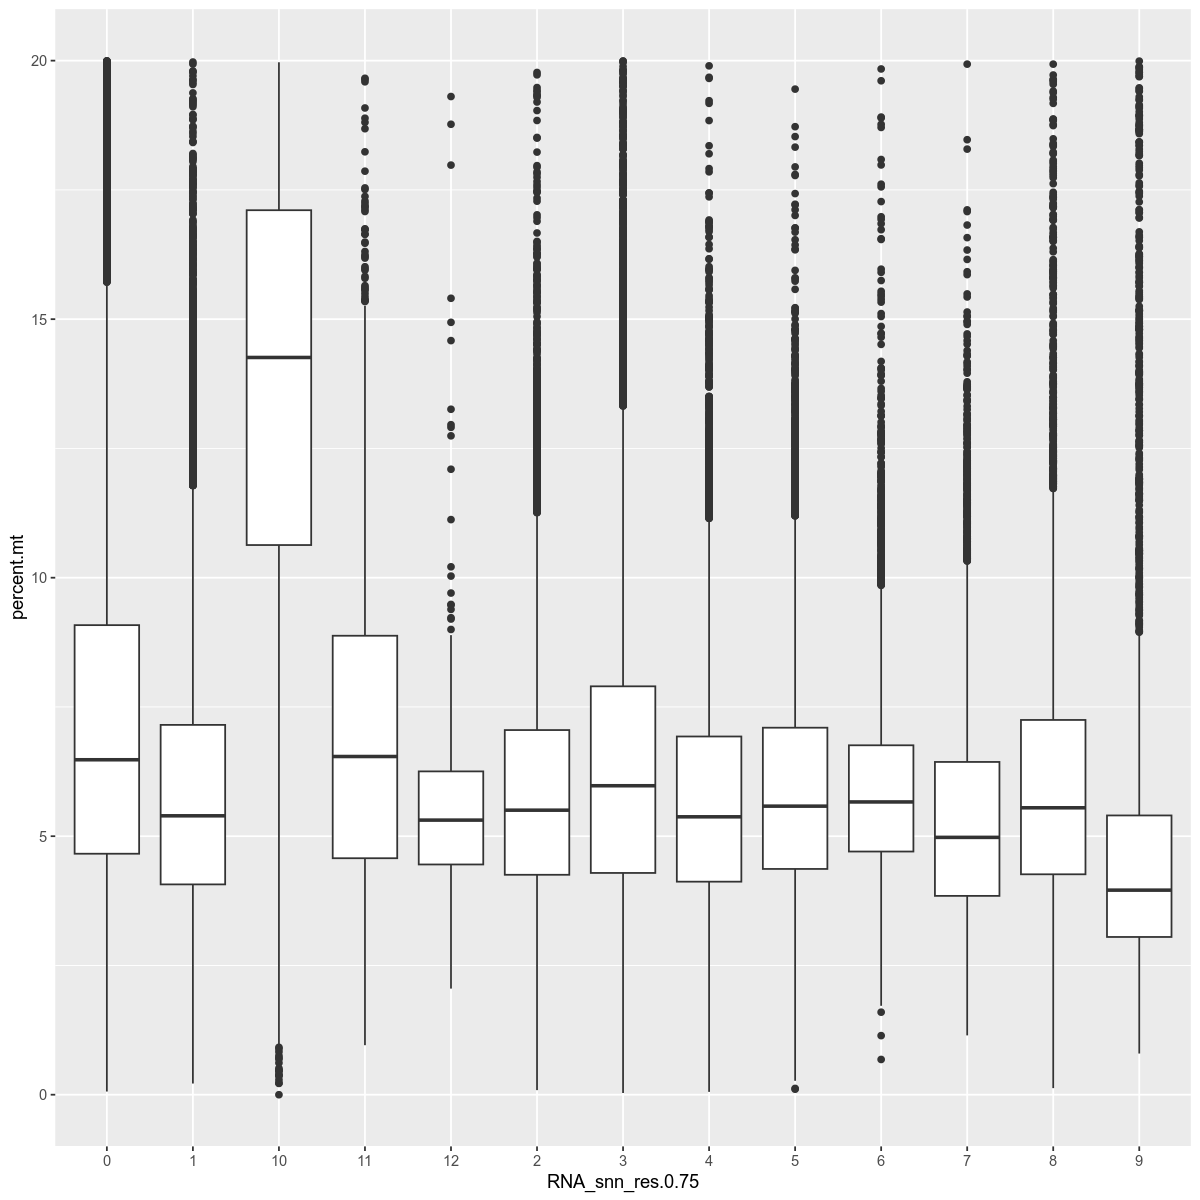

In [272]:
ggplot(all_obj@meta.data, aes(x = RNA_snn_res.0.75, y = percent.mt)) + 
    geom_boxplot()

In [3]:
pivot_wilcox_expr <- function(wilcox_obj) {
    df <- wilcox_obj %>% select(group, feature, avgExpr) %>% 
                    pivot_wider(names_from = 'feature', values_from = 'avgExpr') %>% data.frame()
    rownames(df) <- df$group
    df <- df %>% select(-group) %>% as.matrix()
    return(df)
}

pivot_wilcox_logFC <- function(wilcox_obj) {
    df <- wilcox_obj %>% select(group, feature, logFC) %>% 
                    pivot_wider(names_from = 'feature', values_from = 'logFC') %>% data.frame()
    rownames(df) <- df$group
    df <- df %>% select(-group) %>% as.matrix()
    return(df)
}

In [4]:
all_obj <- subset(all_obj, subset = RNA_snn_res.0.5 != 11)

In [5]:
de_res0.75 <- wilcoxauc(all_obj[['RNA']]@data, 
                       all_obj@meta.data$RNA_snn_res.0.75)

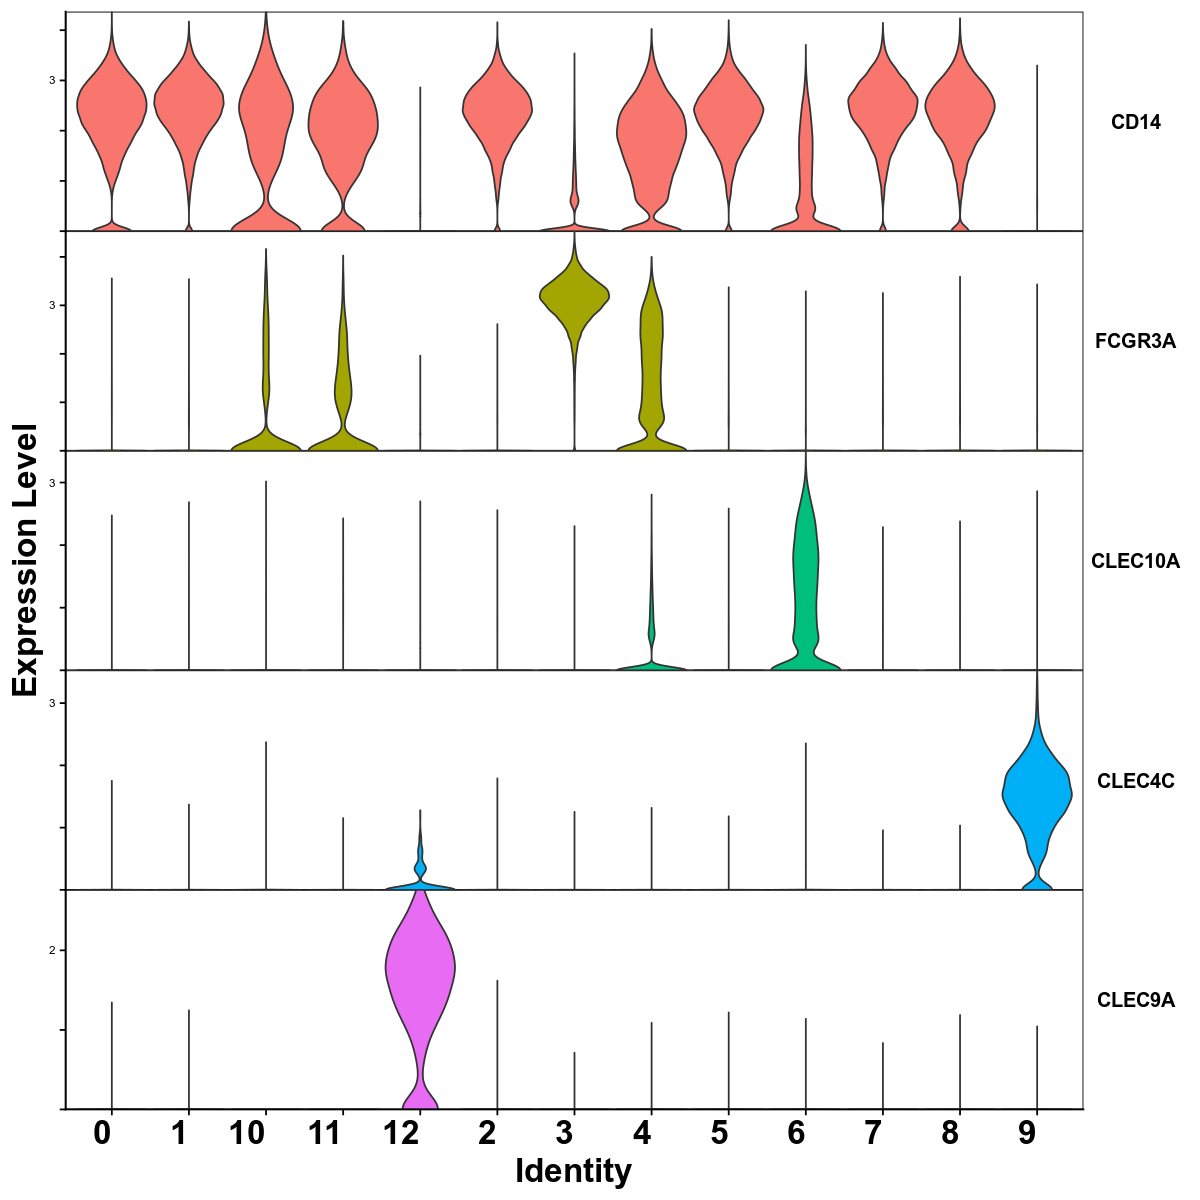

In [262]:
fig.size(10, 10)
VlnPlot(all_obj, feature = c("CD14", "FCGR3A", 
                             "CLEC10A",
                             "CLEC4C",
                             "CLEC9A"),
        raster = FALSE, stack = TRUE, flip = TRUE,
        group.by = 'RNA_snn_res.0.75') + 
    theme(
        legend.position = "none",
        axis.text.x = element_text(color = "black", angle = 0, size = 20, face = "bold"),
        axis.title = element_text(size=20, face = "bold"))

In [6]:
annotations <- data.frame(group = as.character(seq(0, 12)),
                          annotation = c("M0. CD14+ CD16- S100Ahigh", 
                                         "M1. CD14+ CD16- CXCL8+",
                                         "M2. CD14+ CD16- CCR2high",
                                         "M3. CD16++ CD14dim CDKN1C+",
                                         "M4. CD14+ CD16+ MHC2higher",
                                         "M5. CD14+ CD16- LGALS2+",
                                         "DC6. CLEC10A+ CD1C+ DC2",
                                         "M7. CD14+ CD16- ISGhigh", 
                                         "P8. PPBP+ GP1BB+ Platelet",
                                         "DC9. TCF4+ CLEC4C+ pDC",
                                         "M10. MThigh",
                                         "M11. CD14+ CD16+ MHC2lower",
                                         "DC12. CLEC9A+ XCR1+ DC1"))

In [8]:
filter_genes <- c("CD14", "FCGR3A", "CCR2", "S100A8", "S100A9", "S100A12",
                  "LGALS2", "ISG15", "IFI44L", "CXCL8", "CCR2", "CDKN1C",
                  "CLEC10A", "CD1C",
                  "PPBP", "GP1BB", "CLEC4C", "TCF4", "CLEC9A", "XCR1", 
                  "HLA-DRA", "HLA-DPA1", "HLA-DPB1")

In [9]:
plot_df <- pivot_wilcox_expr(de_res0.75 %>% 
                                    left_join(annotations) %>% select(-group) %>% 
                                    rename(group = annotation) %>% filter(feature %in% filter_genes))

filter_genes <- c("CD14", "FCGR3A", "CCR2", "S100A8", "S100A9", "S100A12",
                  "LGALS2", "ISG15", "IFI44L", "CXCL8", "CCR2", "CDKN1C",
                  "CLEC10A", "CD1C",
                  "PPBP", "GP1BB", "CLEC4C", "TCF4", "CLEC9A", "XCR1", 
                  "HLA.DRA", "HLA.DPA1", "HLA.DPB1")

Joining, by = "group"


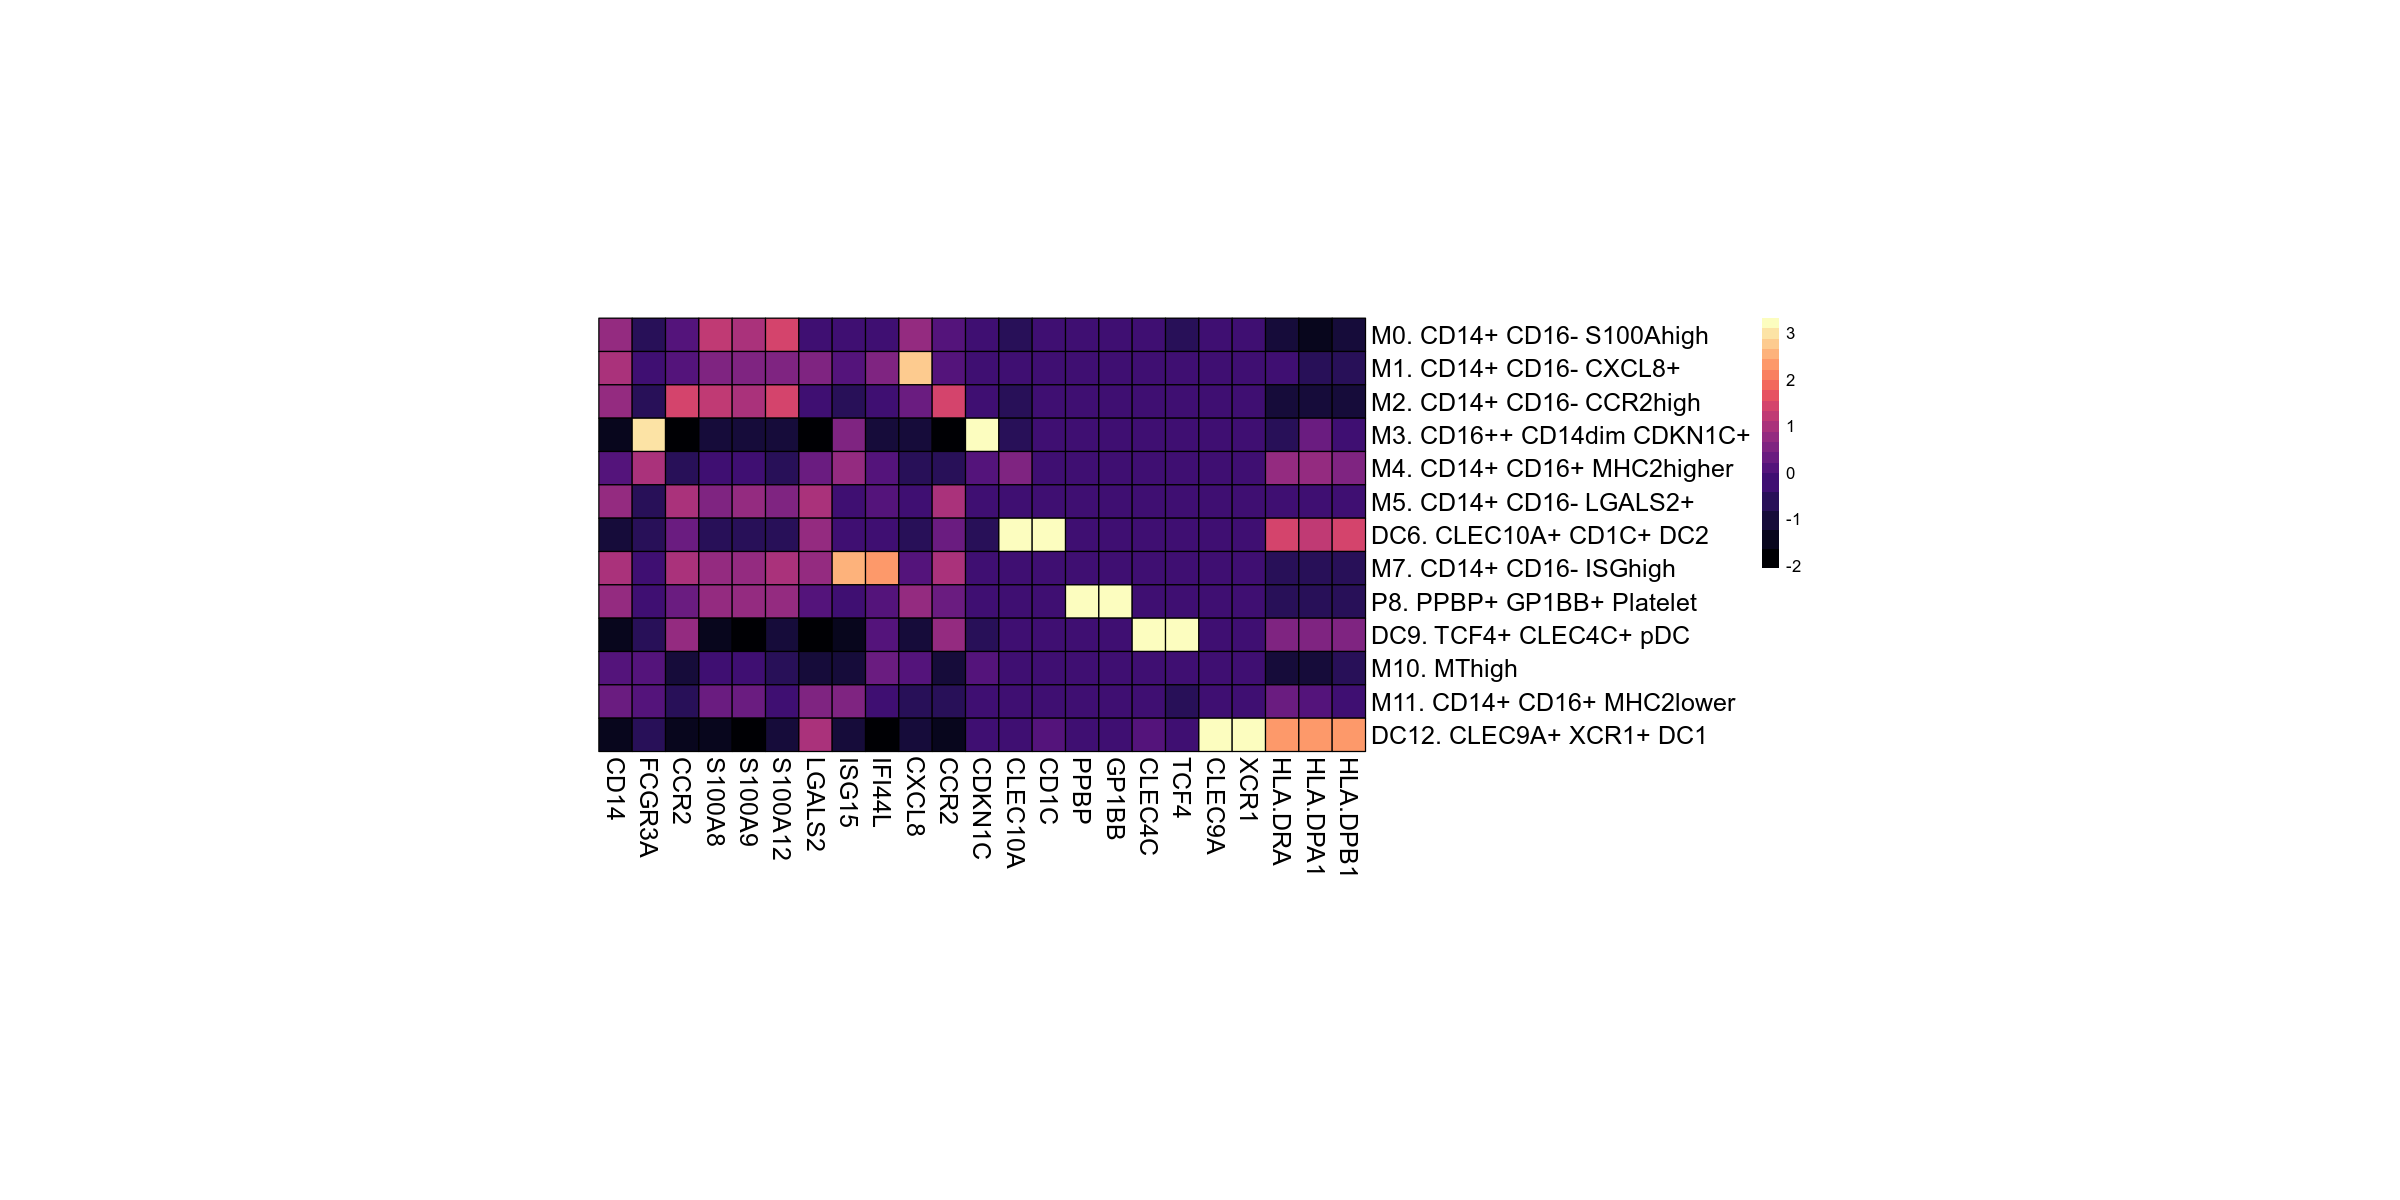

In [11]:
fig.size(10, 20)
pheatmap(scale(plot_df[annotations$annotation, filter_genes]),
        scale = "none", cluster_rows = FALSE, cluster_cols = FALSE,
      #  color=c(colorRampPalette(c("purple", "black"))(10),  colorRampPalette(c("black", "yellow"))(10)), 
        color = magma(20),
        breaks = c(seq(min(scale(plot_df)), 0, abs(min(scale(plot_df))) / 5), 
                   seq(0, abs(max(scale(plot_df))), abs(max(scale(plot_df))) / 15)) %>% unique(), 
        cellwidth= 20,
        cellheight= 20,
        fontsize_row = 15,
        fontsize_col = 15,
        border_color = "black")

In [323]:
qcd_meta <- cbind(all_obj@meta.data, Embeddings(all_obj, reduction = "umap"))

cluster_center <- qcd_meta %>%
                  group_by(RNA_snn_res.0.75) %>%
                  summarise_at(vars(UMAP_1, UMAP_2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

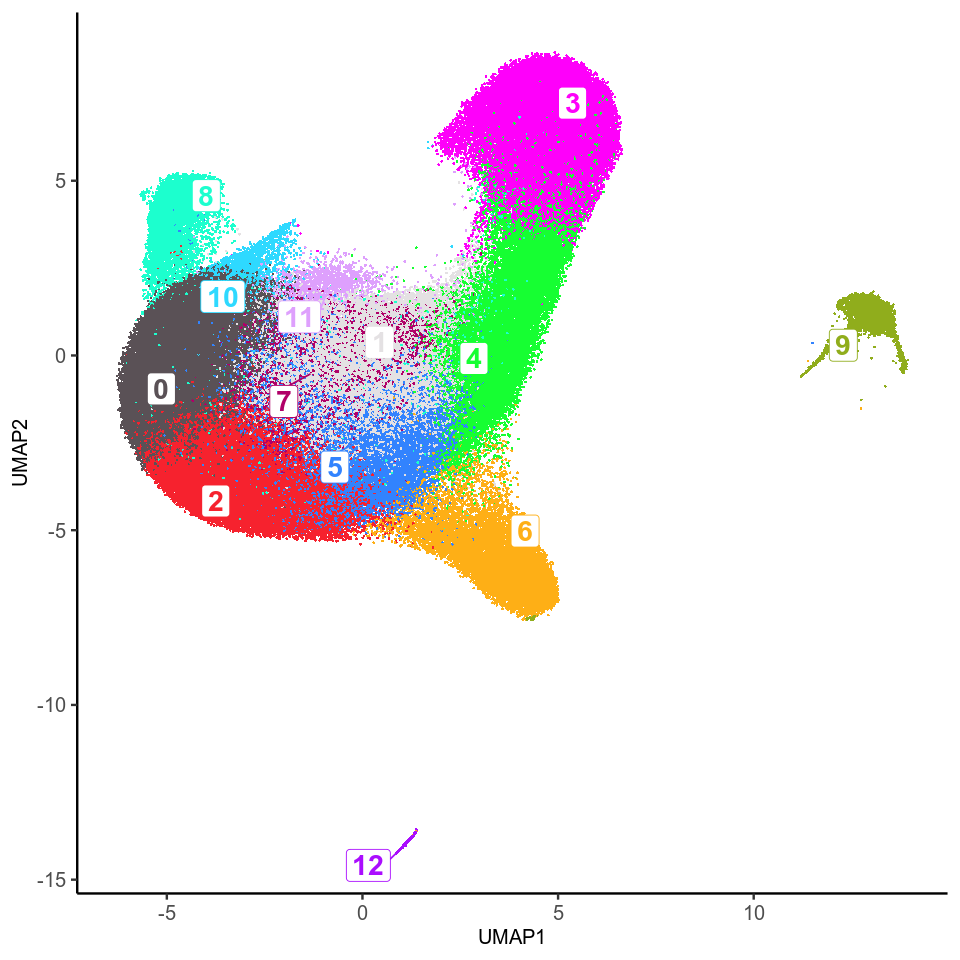

In [329]:
set.seed(71)
options(repr.plot.height = 8, repr.plot.width = 8)

ggplot() +
  geom_point(
    data = qcd_meta[sample(nrow(qcd_meta)), ] %>% select(UMAP_1, UMAP_2, RNA_snn_res.0.75) %>% 
              mutate(RNA_snn_res.0.75 = factor(RNA_snn_res.0.75, levels = seq(0, 12))), 
    aes(x = UMAP_1, y = UMAP_2, color = RNA_snn_res.0.75),
    size = 0.75, stroke = 0.0001,
  ) +
  ggrepel::geom_label_repel(
    data = cluster_center,
    aes(x = UMAP_1, y = UMAP_2, label = as.character(RNA_snn_res.0.75), 
        color = as.character(RNA_snn_res.0.75)),
    size = 6,  fontface = "bold",
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.01, "lines"),
    show.legend = FALSE
  ) +
    scale_color_manual(values =as.vector(polychrome(26))) +
    theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
          axis.title = element_text(size = 12),
          plot.title = element_text(hjust = 0.5, size = 18, face = "bold")
  ) +
    labs(x = "UMAP1", y = "UMAP2") +
    guides(color = guide_legend(ncol = 1, override.aes = list(size = 8))) 

## EXPORTING OBJECTS

In [ ]:
all_obj <- subset(all_obj, subset = RNA_snn_res.0.5 != 11)

In [11]:
saveRDS(Embeddings(all_obj, reduction = "harmony"), '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_mono_dc_pbmc_hPCs_new.rds')
saveRDS(Embeddings(all_obj, reduction = "umap"), '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_mono_dc_pbmc_umap_new.rds')
saveRDS(all_obj@meta.data, '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_mono_dc_pbmc_metadata_new.rds')

In [10]:
unique(all_obj@meta.data$RNA_snn_res.0.5)

[1] 2  1  7  3  4  0  9  8  5  6  10
Levels: 0 1 10 11 2 3 4 5 6 7 8 9

## CHECKING AGAINST CNA

### CASE/CONTROL

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



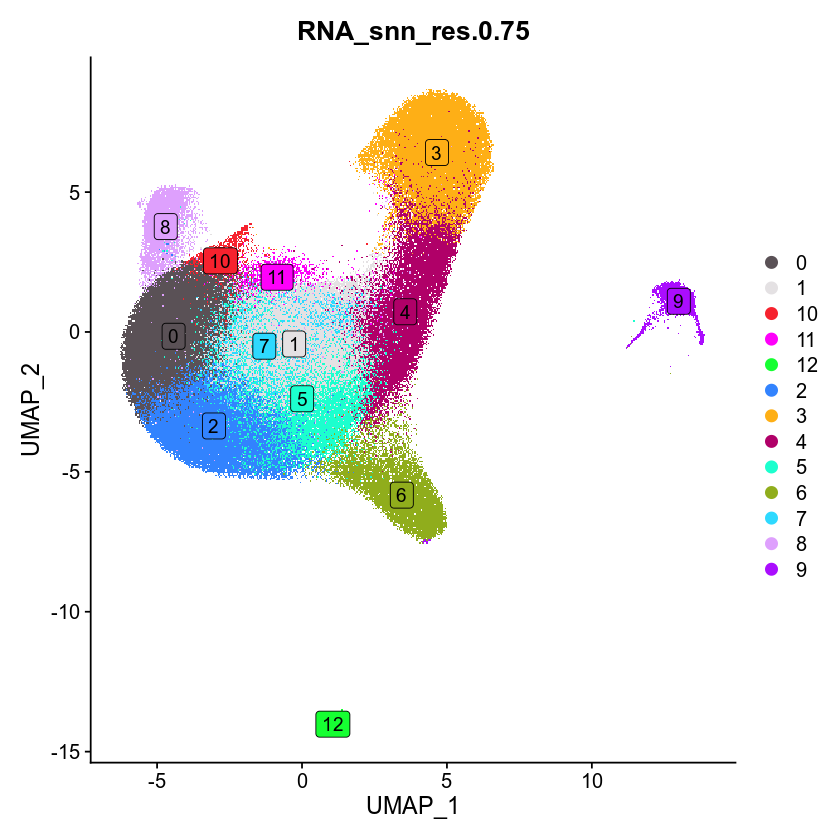

In [256]:
fig.size(7, 7)
DimPlot(all_obj, reduction = "umap", group.by = 'RNA_snn_res.0.75',
        cols = as.vector(polychrome(26)), label = TRUE,
        label.box = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



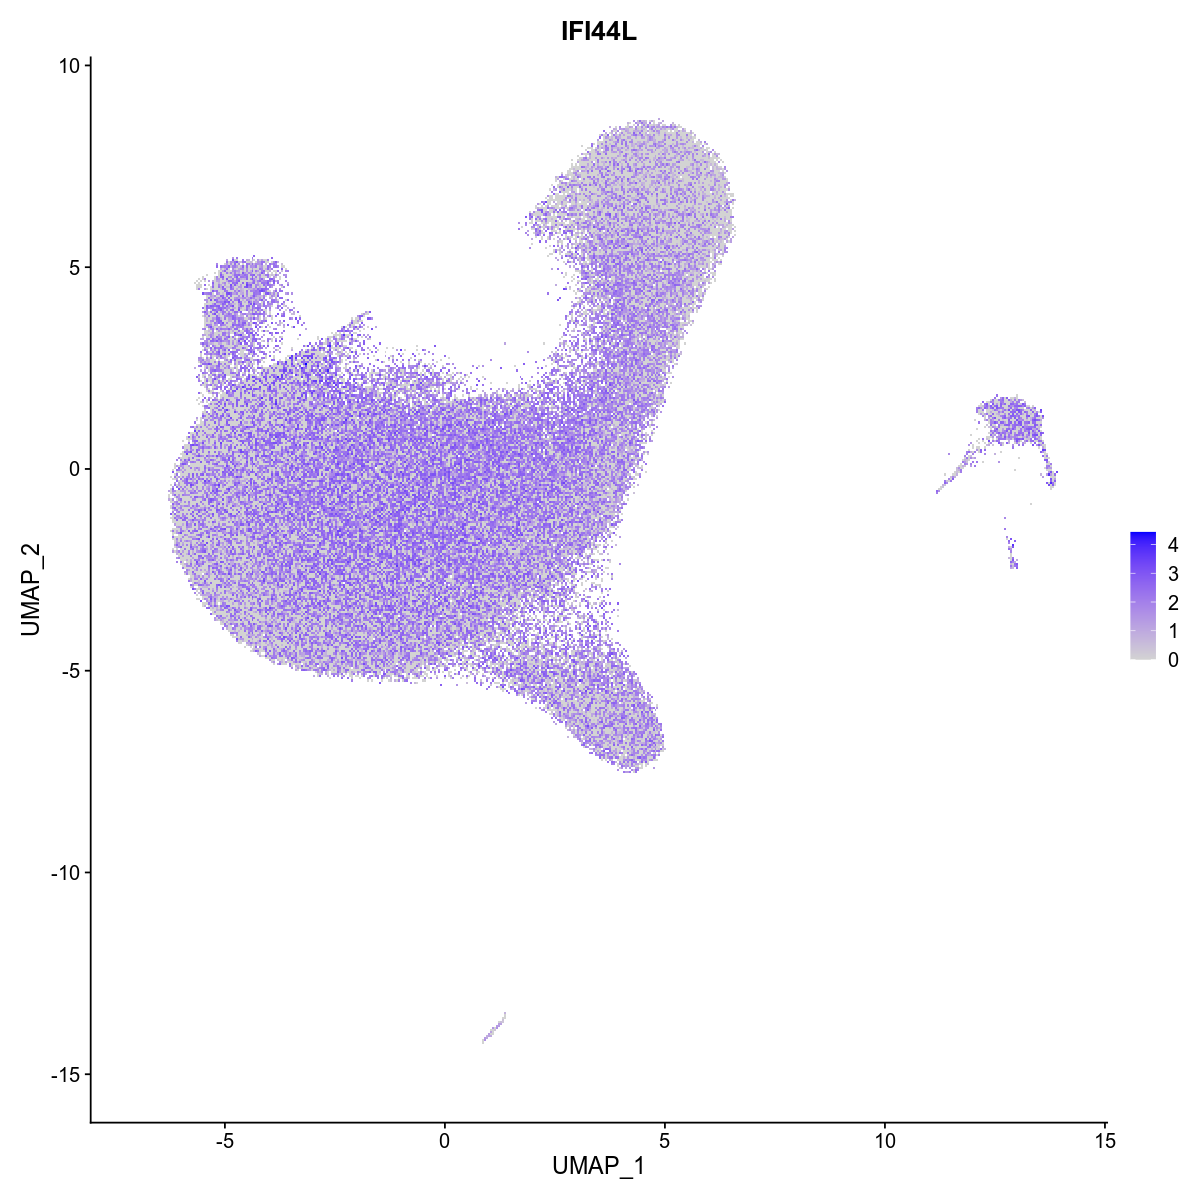

In [13]:
FeaturePlot(all_obj, feature = "IFI44L")

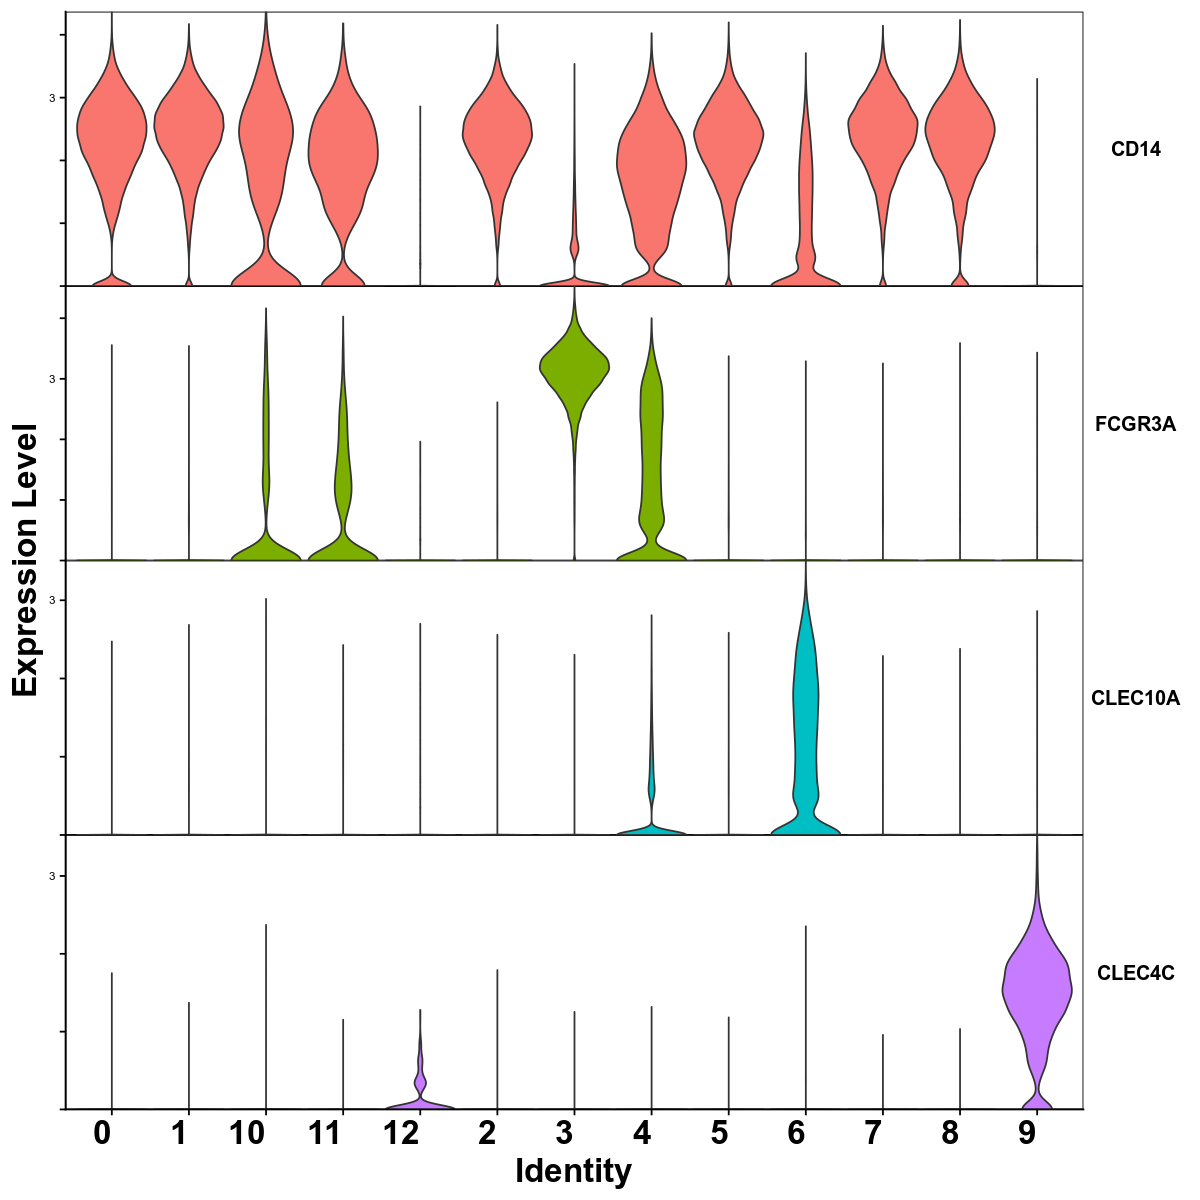

In [259]:
fig.size(10, 10)
VlnPlot(all_obj, feature = c("CD14", "FCGR3A", 
                             "CLEC10A",
                             "CLEC4C"),
        raster = FALSE, stack = TRUE, flip = TRUE,
        group.by = 'RNA_snn_res.0.75') + 
    theme(
        legend.position = "none",
        axis.text.x = element_text(color = "black", angle = 0, size = 20, face = "bold"),
        axis.title = element_text(size=20, face = "bold"))

In [31]:
de_res0.5 <- wilcoxauc(all_obj[['RNA']]@data, 
                       all_obj@meta.data$RNA_snn_res.0.5)

ERROR: Error: cannot allocate vector of size 4.5 Gb


In [57]:
kidney_cor <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna/myeloid/sc_myeloid_casecontrol_genecor.rds')
genes <- kidney_cor %>% na.omit() %>% pull(gene)

In [60]:
meta <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/case_control/meta.csv")
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/case_control/ncorr.csv", header = FALSE)

In [61]:
blood_cor <- parallel::mclapply(genes, function(gene) {
                                obj <- cor.test(all_obj[['RNA']]@data[gene, meta$Cell], ncorr$V1)
                                return(c(obj$estimate, obj$p.value))},
                                mc.cores = 10)
saveRDS(blood_cor, '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/case_control/gene_ncorr.rds')

### CHRONICITY

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



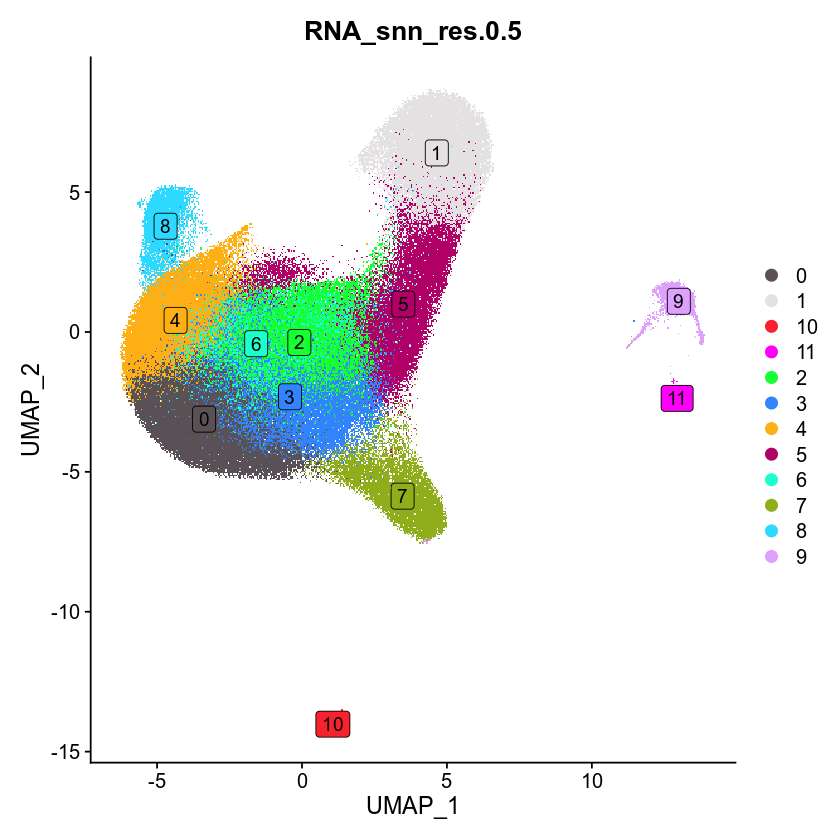

In [3]:
fig.size(7, 7)
DimPlot(all_obj, reduction = "umap", group.by = 'RNA_snn_res.0.5',
        cols = as.vector(polychrome(26)), label = TRUE,
        label.box = TRUE)

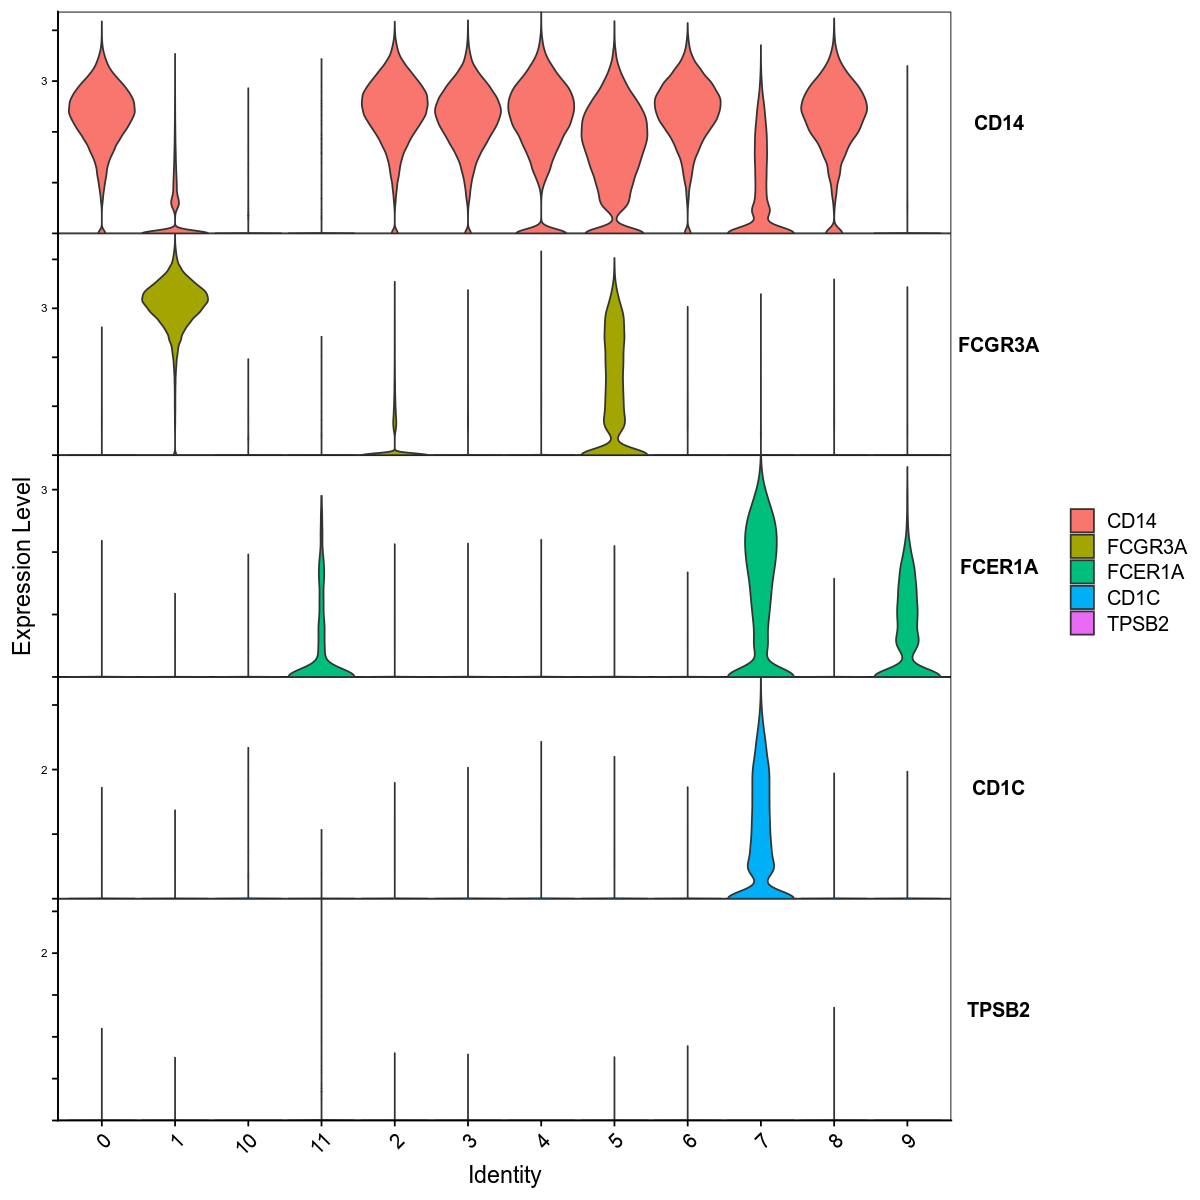

In [4]:
fig.size(10, 10)
VlnPlot(all_obj, feature = c("CD14", "FCGR3A", 
                             "FCER1A", "CD1C",
                             "TPSB2"),
        raster = FALSE, stack = TRUE, flip = TRUE,
        group.by = 'RNA_snn_res.0.5')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



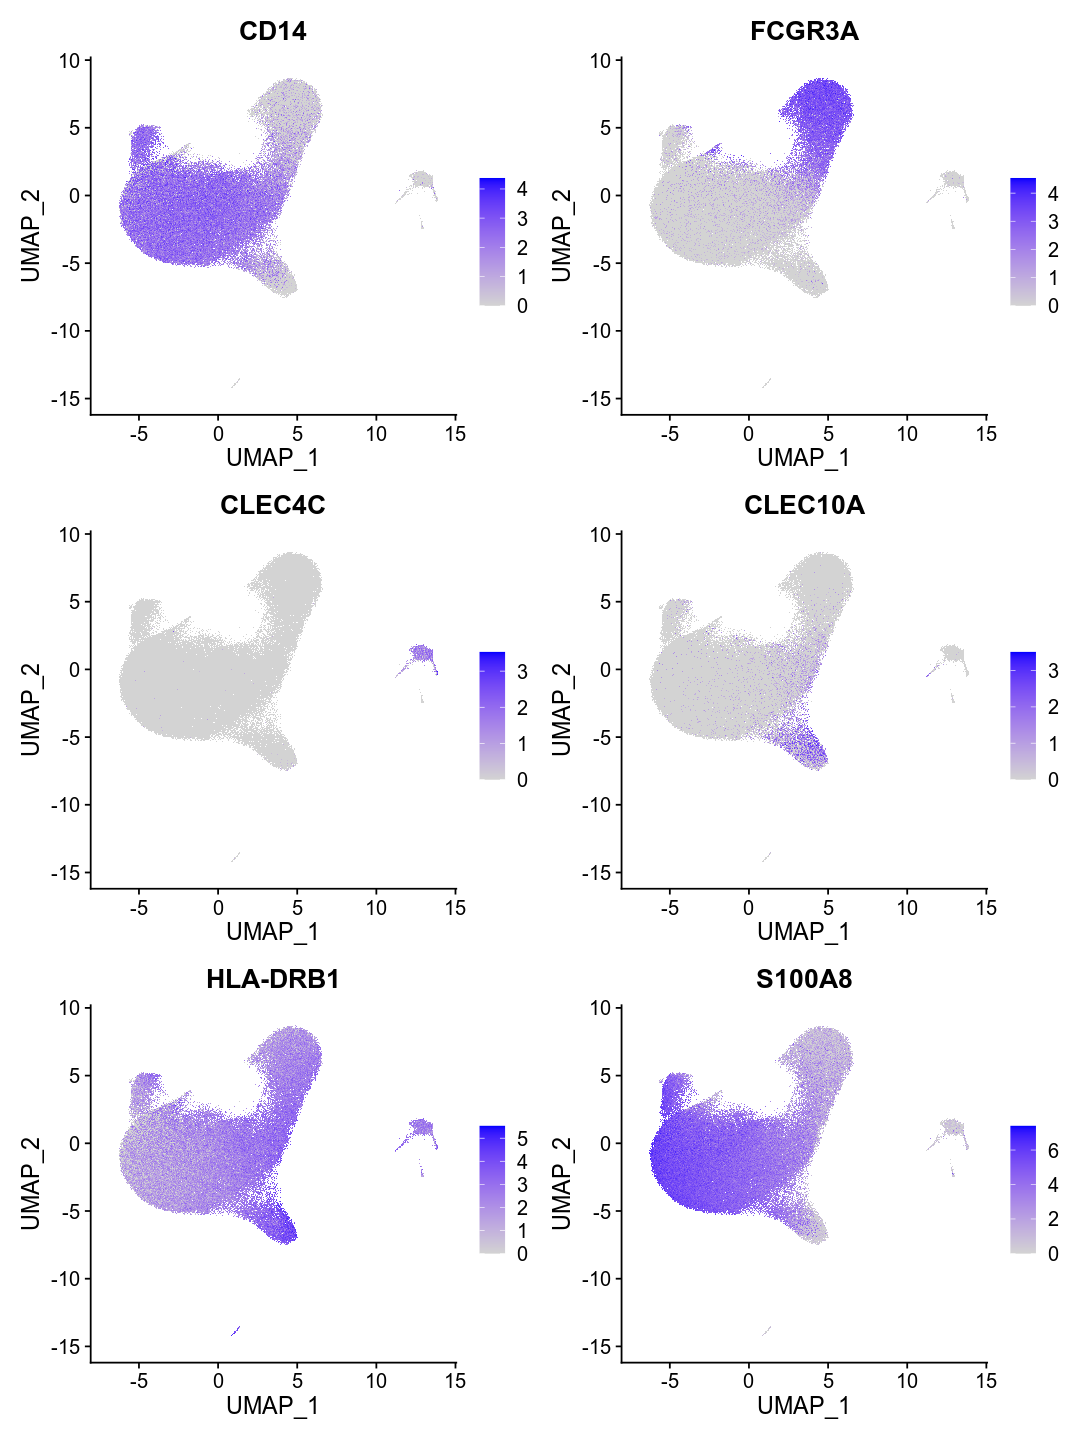

In [33]:
fig.size(12, 9)
FeaturePlot(all_obj, 
                    feature = c("CD14", "FCGR3A", 
                                "CLEC4C", "CLEC10A",
                                "HLA-DRB1", "S100A8"))

In [5]:
kidney_cor <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/myeloid/chronicity/conditional_ncorr_gene_corrs.rds')
genes <- kidney_cor %>% na.omit() %>% pull(gene)

In [4]:
meta <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/chronicity/meta.csv")
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/chronicity/ncorr.csv", header = FALSE)

In [16]:
cor.test(all_obj[['RNA']]@data['FCER1A', meta$Cell], ncorr$V1)


	Pearson's product-moment correlation

data:  all_obj[["RNA"]]@data["FCER1A", meta$Cell] and ncorr$V1
t = 38.932, df = 84087, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1264198 0.1396984
sample estimates:
      cor 
0.1330651 


In [15]:
cor.test(all_obj[['RNA']]@data['FCGR3A', meta$Cell], ncorr$V1)


	Pearson's product-moment correlation

data:  all_obj[["RNA"]]@data["FCGR3A", meta$Cell] and ncorr$V1
t = 178.51, df = 84087, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5193112 0.5291143
sample estimates:
      cor 
0.5242301 


In [9]:
blood_cor <- parallel::mclapply(genes, function(gene) {
                                obj <- cor.test(all_obj[['RNA']]@data[gene, meta$Cell], ncorr$V1)
                                return(c(obj$estimate, obj$p.value))},
                                mc.cores = 10)
saveRDS(blood_cor, '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/chronicity/gene_ncorr.rds')

In [40]:
blood_cor <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/mono_dc/chronicity/gene_ncorr.rds')
blood_cor <- data.frame(do.call(rbind, blood_cor))
blood_cor <- blood_cor %>% 
                    mutate(gene = genes) %>% 
                    rename(cor_estimate = cor,
                           cor_pval = V2)

In [50]:
combined_cor <- left_join(blood_cor, 
                          kidney_cor, by = "gene") %>% na.omit()

`geom_smooth()` using formula = 'y ~ x'


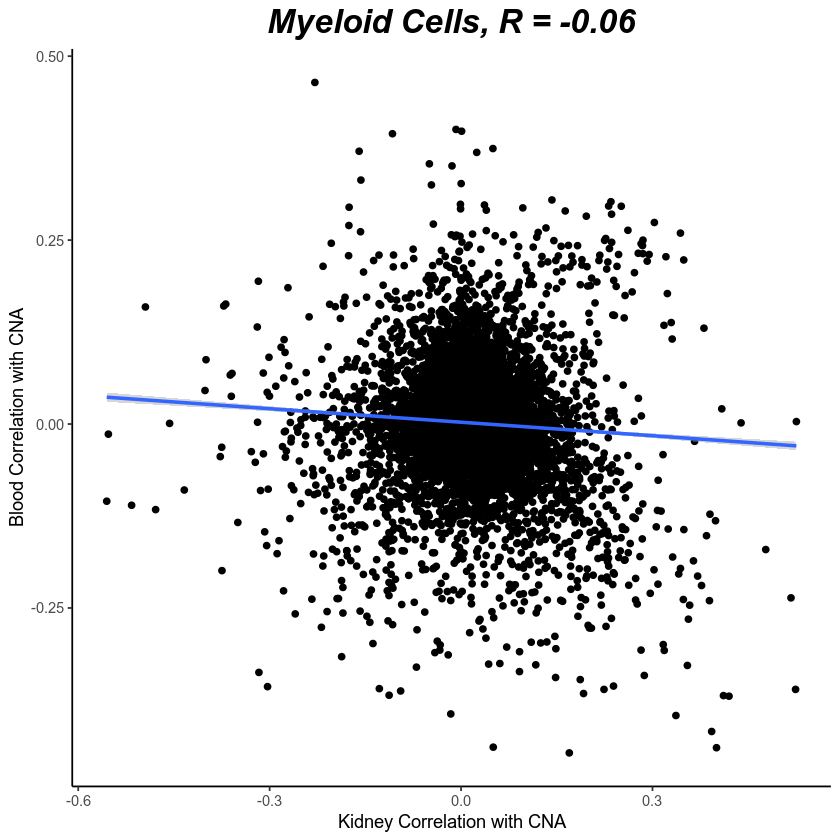

In [54]:
ggplot(combined_cor, aes(x = cor_estimate.x,
                         y = cor_estimate.y)) + 
    geom_point() + 
    theme_classic() + 
    geom_smooth(method = "lm") + 
    labs(x = "Kidney Correlation with CNA",
         y = "Blood Correlation with CNA",
         title = "Myeloid Cells, R = -0.06") + 
    theme(plot.title = element_text(size = 20, hjust = 0.5, face = "bold.italic"))

In [53]:
cor.test(combined_cor$cor_estimate.x, combined_cor$cor_estimate.y)


	Pearson's product-moment correlation

data:  combined_cor$cor_estimate.x and combined_cor$cor_estimate.y
t = -10.787, df = 26786, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07767861 -0.05383185
sample estimates:
        cor 
-0.06576462 
